<a href="https://colab.research.google.com/github/BenBowring/EnergyData/blob/main/DataInvestigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
transacts = drive.CreateFile({'id': '1MPuNhnaCwBdQa4E941TiWvBLX9z74QxN'})
transacts.GetContentFile('transact_data.csv')

In [5]:
mapped_installs = drive.CreateFile({'id': '1vtTG0o8Sfa4S1zwsDQZPjsaY1KYnIhp_'})
mapped_installs.GetContentFile('JanCompTrimmed.xlsx')

In [6]:
full_installs = drive.CreateFile({'id': '1H9osyBVtiS7oMKQP1Mo0guM6lSoxC262'})
full_installs.GetContentFile('AccCompliance.xlsx')

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [8]:
transact_df = pd.read_csv('transact_data.csv')

full_df = pd.read_excel('AccCompliance.xlsx')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15,17,18,19,21,22,23,24,25,26,27,28,43,44,45,47,48,49,50,51,52,53,54,58,60,63) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
mapped_df = pd.read_excel('JanCompTrimmed.xlsx')

In [10]:
counts = mapped_df.groupby('Company name').agg({'ICIS-ID': 'count'}).sort_values('ICIS-ID', ascending = False)

kept_cols = ['Installation ID', 'Installation name', 'Country code',
               'Permit identifier', 'Activity code', 'Nace code', 'Installation city',
               'Account  holder name', 'Company activity', 'TS status',
               'Installation address 1', 'Installation ZIP',
               'Installation city.1']

dropped_cols = [x for x in mapped_df.columns if x not in kept_cols]

name_cols = ['Name 1', 'Name 2', 'Name 3']


In [11]:
counts[counts['ICIS-ID'] == 1]

,ICIS-ID
Company name,
Occidental Petroleum,1
UNITEDHEALTH GROUP,1
Oestermose BioEnergi A/S,1
Obras y servicios SGASA S.A.,1
ZOLTEK ZRT,1
...,...
GLOBAL MISSION LLC,1
GLOBAL MANGEMENT CONSULTING,1
GLEN WEST 300 INC TRUSTEE,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


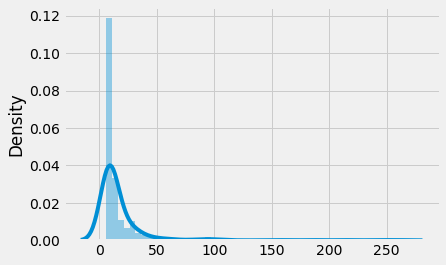

In [12]:
sns.distplot(counts[counts['ICIS-ID'] > 5])

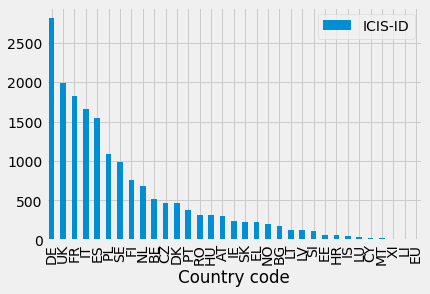

In [13]:
country_dist = mapped_df.groupby('Country code').agg({'ICIS-ID': 'count'}).sort_values('ICIS-ID', ascending = False)
country_dist.plot(kind = 'bar')

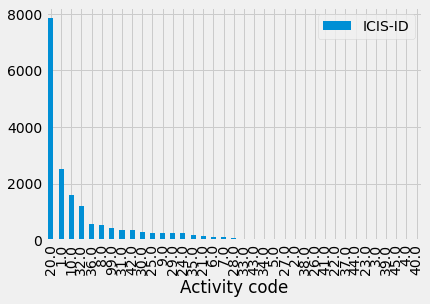

In [14]:
activity_dist = mapped_df.groupby('Activity code').agg({'ICIS-ID': 'count'}).sort_values('ICIS-ID', ascending = False)
activity_dist.plot(kind = 'bar')

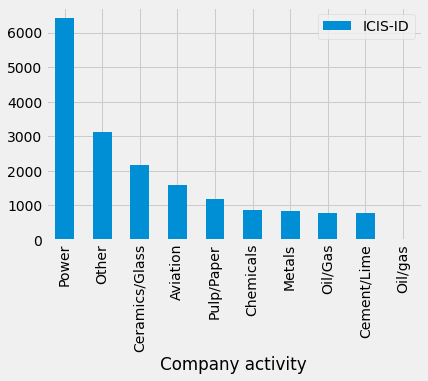

In [15]:
alt_activity_dist = mapped_df.groupby('Company activity').agg({'ICIS-ID': 'count'}).sort_values('ICIS-ID', ascending = False)
alt_activity_dist.plot(kind = 'bar')

In [18]:
transact_df[transact_df['TRANSFERRING_ACCOUNT_HOLDER'] == 'Vetropack Austria GmbH'].head(1)

,TRANSACTION_ID,TRANSACTION_TYPE,TRANSACTION_DATE,TRANSACTION_STATUS,TRANSFERRING_REGISTRY_NAME,TRANSFERRING_ACCOUNT_TYPE,TRANSFERRING_ACCOUNT_TYPE2,TRANSFERRING_ACCOUNT_OPEN_DT,TRANSFERRING_ACCOUNT_END_OF_VALIDITY,TRANSFERRING_ACCOUNT_NAME,...,ACQUIRING_INSTALLATION_MAIN_ACTIVITY,ORIGINATING_REGISTRY,UNIT_TYPE_DESCRIPTION,SUPP_UNIT_TYPE_DESCRIPTION,ORIGINAL_PERIOD_CODE,LULUCF_CODE_DESCRIPTION,PROJECT_IDENTIFIER,TRACK,EXPIRY_DATE,AMOUNT
36908,EU380300,10-2,2017-03-20 15:29:13,Completed,Austria,100.0,100-Holding Account,2005-06-16 00:00:00,NaN,Vetropack Pöchlarn,...,-,EU,Non-Kyoto Unit,EU General Allowances (EUA),2,NaN,NaN,NaN,NaN,52607


In [21]:
len(mapped_df['Installation name'].unique())

17188

In [99]:
mapped_string = mapped_df['Installation name'].unique()
transact_string = transact_df['TRANSFERRING_ACCOUNT_NAME']
contained_names = [install for install in mapped_string if install in transact_string]

In [106]:
amount_out = transact_df.groupby('TRANSFERRING_ACCOUNT_NAME').agg({'AMOUNT': ['sum']})
amount_in = transact_df.groupby('ACQUIRING_ACCOUNT_NAME').agg({'AMOUNT': ['sum']})

In [113]:
len([install for install in mapped_string if install in amount_in.index])

4433

array(['Calmit Bad Ischl', 'Vetropack Pöchlarn',
       'Verbund FHKW Werndorf 1 Wildon', ..., 'Dairy Crest Ltd',
       'Northcot Brick Limited', 'EP Kilroot Power'], dtype=object)